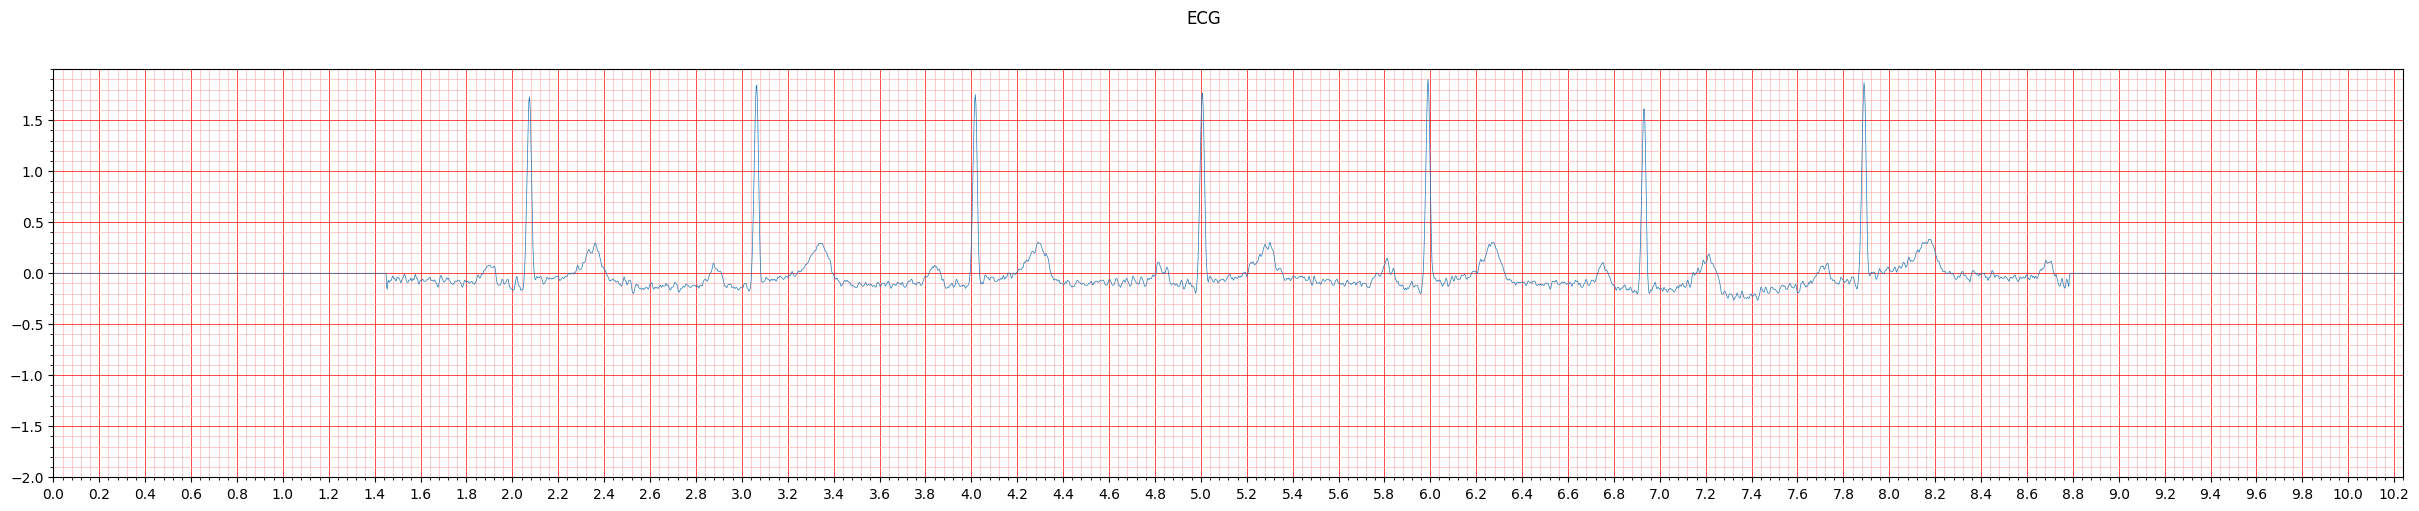

In [1]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from math import ceil 


def _ax_plot(ax, x, y, secs=10, lwidth=0.5, amplitude_ecg = 1.8, time_ticks =0.1):
    ax.set_xticks(np.arange(0,11,time_ticks))    
    ax.set_yticks(np.arange(-ceil(amplitude_ecg),ceil(amplitude_ecg),0.5))

    #ax.set_yticklabels([])
    #ax.set_xticklabels([])

    ax.minorticks_on()
    
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))

    ax.set_ylim(-amplitude_ecg, amplitude_ecg)
    ax.set_xlim(0, secs)

    ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color=(1, 0.7, 0.7))

    ax.plot(x,y, linewidth=lwidth)


        

def plot_1(ecg, sample_rate=500, title = 'ECG', fig_width = 25, fig_height = 6, line_w = 0.5, ecg_amp = 2.0, timetick = 0.2):
    """Plot multi lead ECG chart.
    # Arguments
        ecg        : m x n ECG signal data, which m is number of leads and n is length of signal.
        sample_rate: Sample rate of the signal.
        title      : Title which will be shown on top off chart
        fig_width  : The width of the plot
        fig_height : The height of the plot
    """
    plt.figure(figsize=(fig_width,fig_height))
    plt.suptitle(title)
    plt.subplots_adjust(
        hspace = 0, 
        wspace = 0.04,
        left   = 0.04,  # the left side of the subplots of the figure
        right  = 0.98,  # the right side of the subplots of the figure
        bottom = 0.2,   # the bottom of the subplots of the figure
        top    = 0.88
        )
    seconds = len(ecg)/sample_rate

    ax = plt.subplot(1, 1, 1)
    #plt.rcParams['lines.linewidth'] = 5
    step = 1.0/sample_rate
    _ax_plot(ax,np.arange(0,len(ecg)*step,step),ecg, seconds, line_w, ecg_amp,timetick)
    

    
    
    
import ecg_plot

# Abrir o arquivo HDF5
path_to_file = '../Database/exams_part17.hdf5' # Substitua pelo caminho real do arquivo
exam_id_to_plot = 1883443  # Substitua pelo exam_id que você deseja plotar

with h5py.File(path_to_file, 'r') as f:
    # Obter os IDs dos exames
    exam_ids = np.array(f['exam_id'])

    # Encontrar o índice correspondente ao exam_id de interesse
    exam_index = np.where(exam_ids == exam_id_to_plot)[0]

    if len(exam_index) == 0:
        print("Exam ID não encontrado.")
    else:
        exam_index = exam_index[0]

        # Acessar os tracings de ECG correspondentes ao exam_index
        exam_tracings = f['tracings'][exam_index]
        
ecg = exam_tracings[:, 0] # load data should be implemented by yourself 
plot_1(ecg, sample_rate=400, title = 'ECG',timetick = 0.2)
plt.savefig('ecg_plot1.png', dpi=300)

plt.show()    

Dimensões do ECG para exam_id 1817070: (12, 4096)


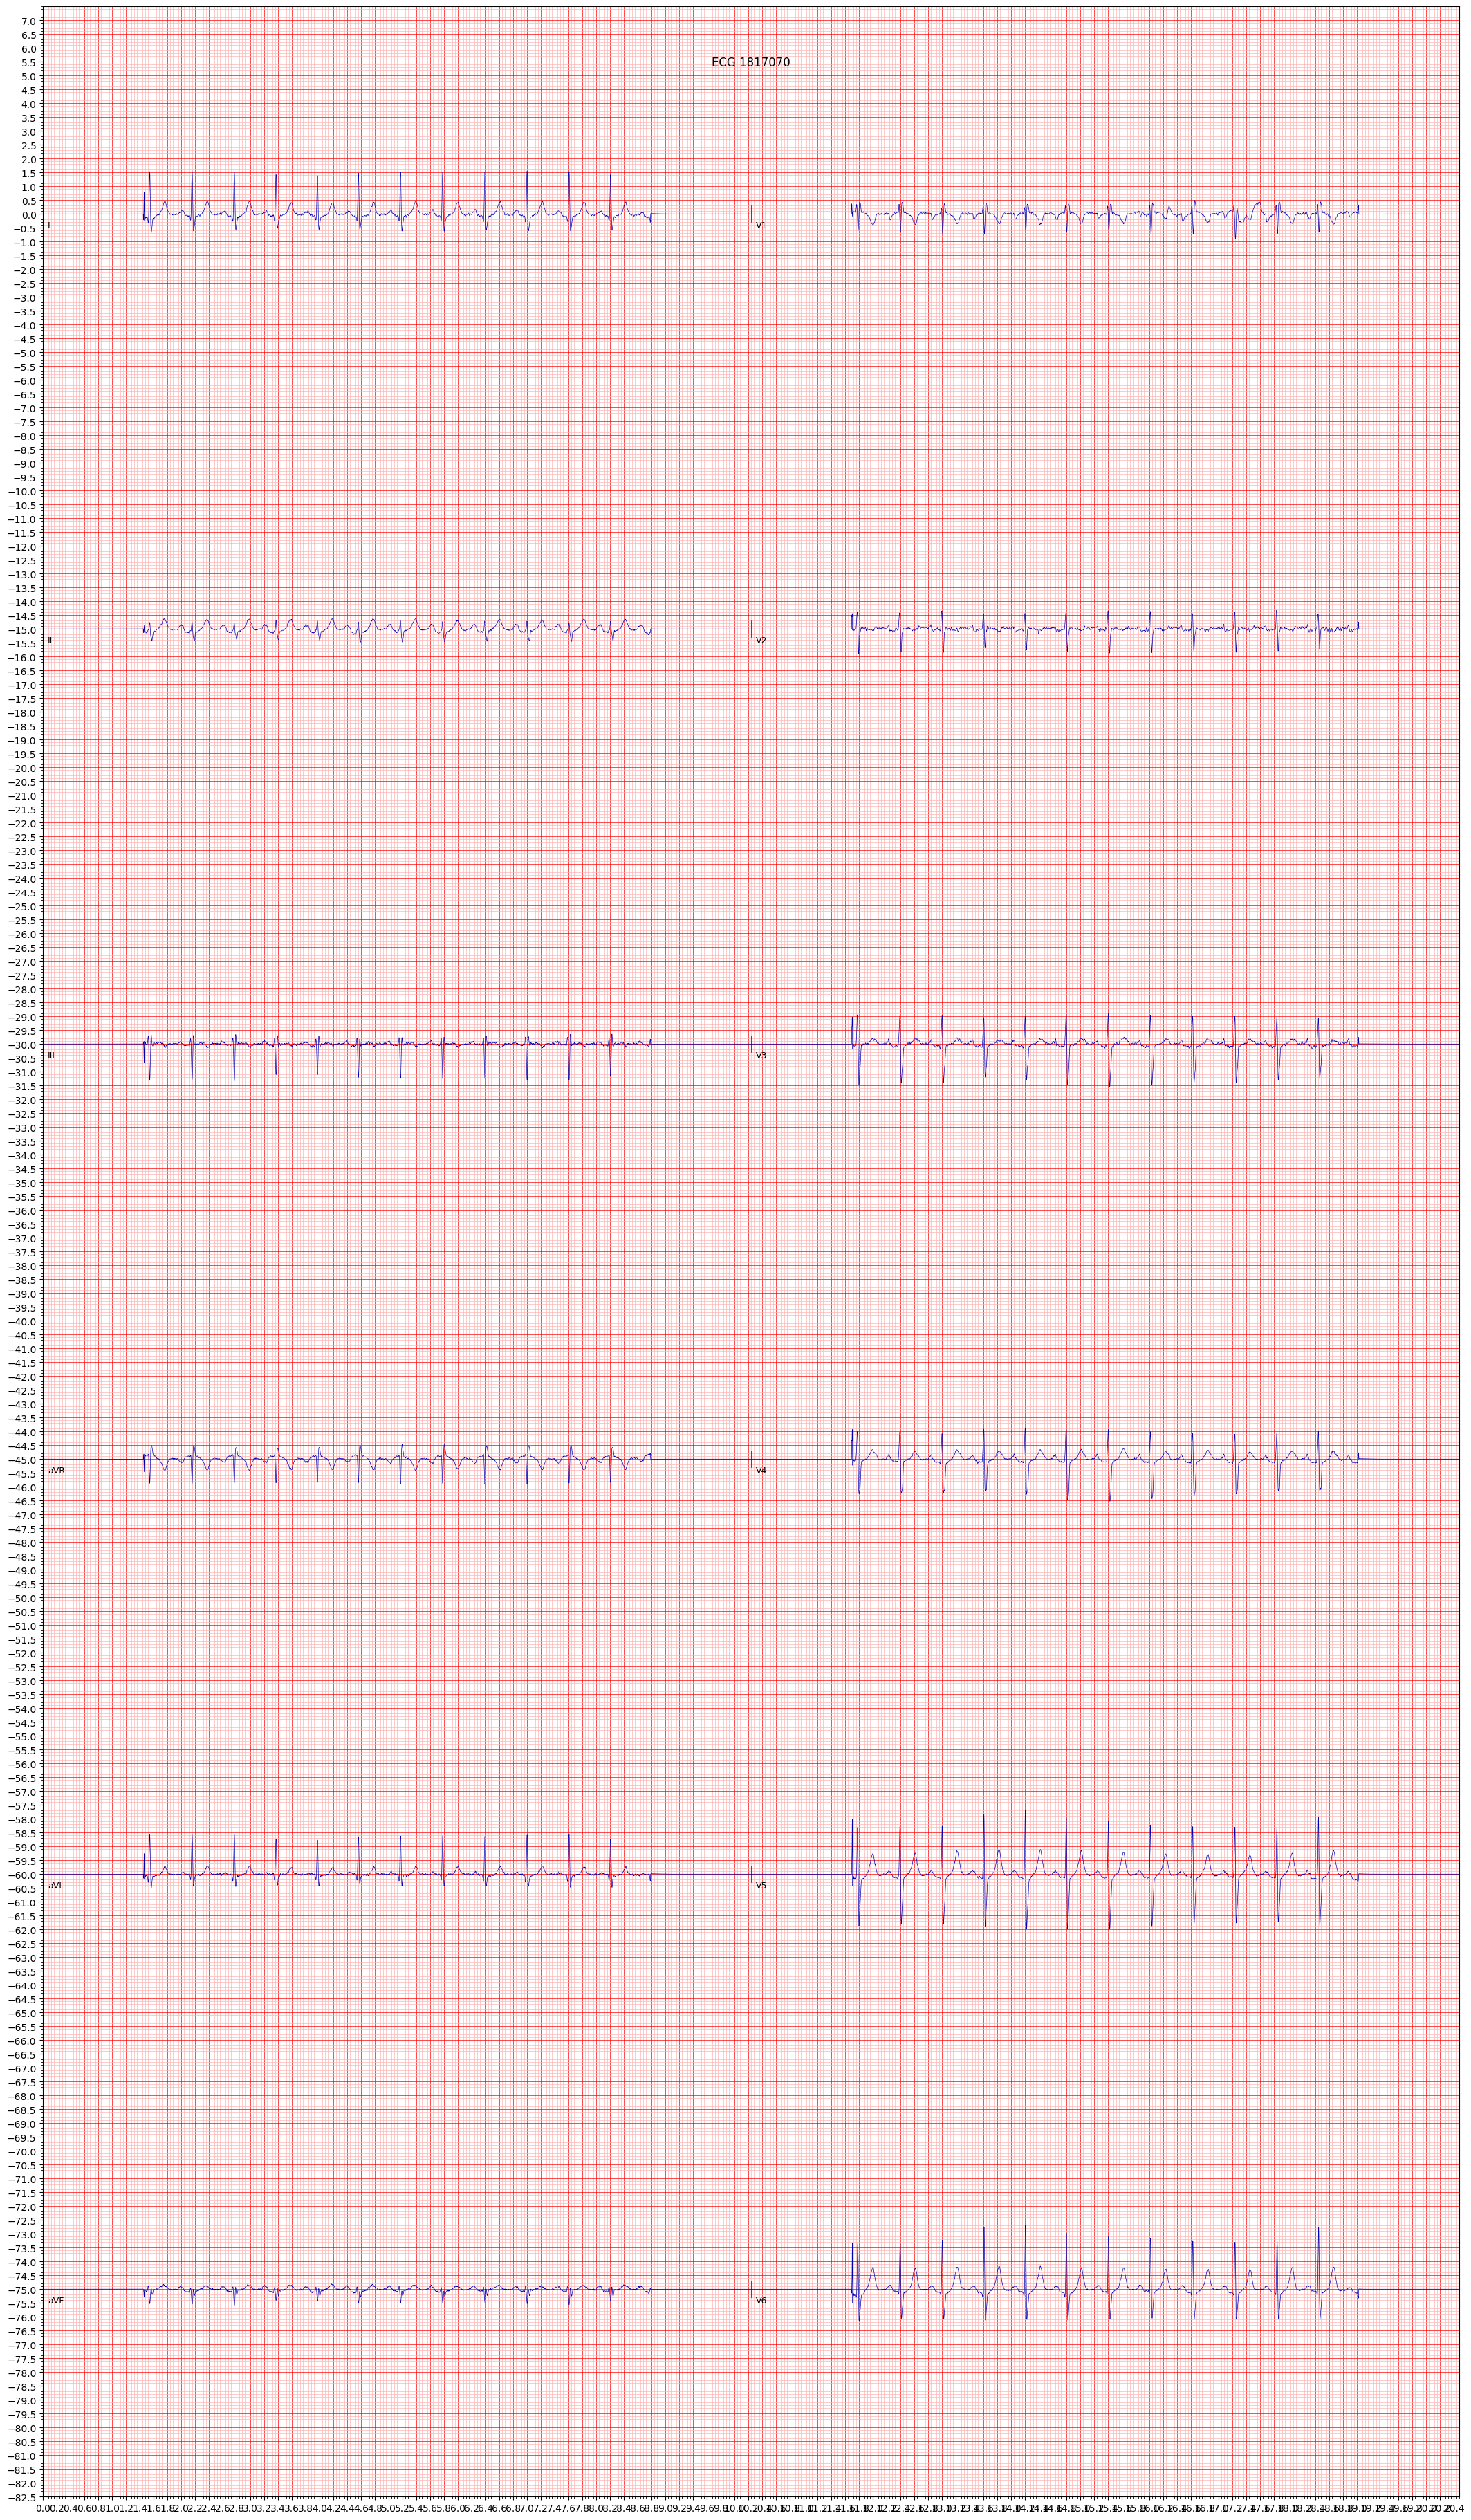

In [2]:
import h5py
import numpy as np
import ecg_plot
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from math import ceil 

# Substitua pelo caminho real do arquivo
path_to_file = 'Database/filtered_exams_16_17.hdf5'
# Substitua pelo vetor de exam_ids que você deseja plotar
exam_ids_to_plot = [1817070]  # Adicione todos os exam_ids desejados neste vetor

# Abrir o arquivo HDF5
with h5py.File(path_to_file, 'r') as f:
    # Obter os IDs dos exames
    exam_ids = np.array(f['exam_id'])

    for exam_id_to_plot in exam_ids_to_plot:
        # Encontrar o índice correspondente ao exam_id de interesse
        exam_index = np.where(exam_ids == exam_id_to_plot)[0]

        if len(exam_index) == 0:
            print(f"Exam ID {exam_id_to_plot} não encontrado.")
        else:
            exam_index = exam_index[0]

            # Acessar os tracings de ECG correspondentes ao exam_index
            exam_tracings = f['tracings'][exam_index]

            # Converter exam_tracings em um array NumPy
            ecg = np.array(exam_tracings)
            ecg = ecg.T
            # Verificar as dimensões do array ecg
            print(f"Dimensões do ECG para exam_id {exam_id_to_plot}: {ecg.shape}")

            # Plotar o ECG
            ecg_plot.plot(ecg, sample_rate=400, title=f'ECG {exam_id_to_plot}', row_height=30)
            plt.savefig(f'ecg({exam_id_to_plot}).png', dpi=200)  # Nome do arquivo com o ID
            ecg_plot.show()
